# Gold Concentration Prediction from Gold Ore Purification

Zyfra will need a prototype machine learning model to predict the gold concentration from gold ore purification.

##  Introduction
Presented is a prototype machine learning model that will predict the amount of gold recoverd from gold ore. 

###  Goal:
This model will help to optimize the production and eliminate unprofitable parameters for gold purification process.


### Stages:
This project will consist of the following stages:

1. Introduction
2. General Information
3. Data Preparation
    1. Datetime Conversion
    2. Missing Value
    3. Missing features
    4. MAE and Recovery
4. Data Analysis
    1. Metal Concentration per Stage
    2. Feed Particle Size Distribution
    3. Total Concentration per Stage
5. Model Development and Training
    1. sMAPE function
    2. Model Training 
6. Conclusion

## General Information

Importing all libraries and modules

In [133]:
#import all necessary libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


Next, we will import all files.

In [134]:
#importing all three files

train = pd.read_csv('/datasets/gold_recovery_train.csv')

test = pd.read_csv('/datasets/gold_recovery_test.csv')

full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [135]:
#checking the general information for train

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [136]:
#General information for test

test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [137]:
#Gerenal information for full

full.head()
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


After looking at the general information about those datasets, we can do a couple of things to prepare the data for further analysis and model training:

1. forward fill missing values in the dataset

2. Check to see whether there are some features not available in the test set

3. Convert date column to datetime objects

4. Create the targets. We will need rougher.output.recovery and final.output.recovery to determine the final sMAPE.

## Data Preparation

### Datetime conversion

We will start with converting 'date' column to datetime objects.

In [138]:
#convert to datetime

train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
full['date'] = pd.to_datetime(full['date'])

#to check

print(train['date'].dtypes)
print(test['date'].dtypes)
print(full['date'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


### Missing values

Next, we will forward fill all of the missing values. As we will need all of the values for the model, they appear to be similar. Since test do not have our target columns, we will fill on the original dataset while creating a new df for train and full. 

In [139]:
#forward filling all NAs

train = train.dropna()
test = test.dropna()
full = full.dropna()

#to check

print(train.isna().sum().sum())
print(test.isna().sum().sum())
print(full.isna().sum().sum())




0
0
0


### Missing Features

Next, we will check for features that might be missing in the test set. 

In [140]:
#Create a loop

missing_cols = pd.DataFrame()
for col in list(train.columns):
    if col not in list(test.columns):
        missing_cols[col]=train[col]
missing_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                                11017 non-null  float64


We can see that 34 of the columns that are present in the train set are not in the test set. In more detail, the test set is lacking 13 parameters from the rougher stage, 8 parameters from the primary cleaner stage, 4 parameters from the secondary cleaner stage, and 9 from the final stage.

### MAE and Recovery

Next, we will check whether the recovery is calculated correctly using the formula provided in the project description. We will do this on the training set. We will find the MAE between our calculation and the feature values.

In [141]:
#to calculate recovery rate

C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']
recovery = train['rougher.output.recovery']

def recovery_calc(C, F, T):
    recovery = ((C * (F - T)) / ((F * (C - T)))) * 100
    print(recovery.head())
    return recovery

calculated_recovery = recovery_calc(C, F, T)

MAE = mean_absolute_error(recovery, calculated_recovery)

print("Mean Absolute Error is:", MAE)

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64
Mean Absolute Error is: 9.460144184559453e-15


The mean absolute error is insignificant, therefore the rougher.output.recovery values are correct.

## Data Analysis

### Metal Concentration per Stage

We will first look at how the concentrations of metals (Au, Ag, Pb) changed depending on the purification stage. 

In [142]:
#we will create a function so we won't need to repeat the same steps multiple times

def plot_pur_stage(data, stage_list):
    for stage in stage_list:
        data[stage].plot(kind = 'hist', bins = 100, figsize= (8,6), legend = True, alpha = 0.5)
        plt.xlabel('Metal Concentration')
        

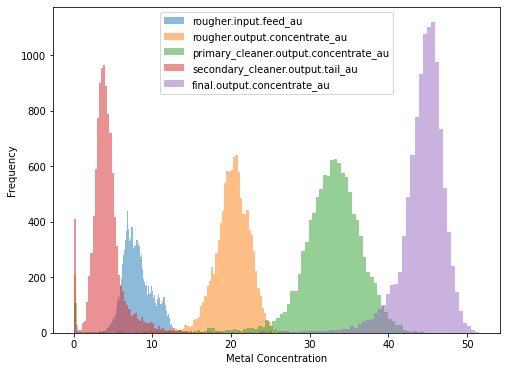

In [143]:
# for Au

au = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','secondary_cleaner.output.tail_au','final.output.concentrate_au']
plot_pur_stage(train, au)

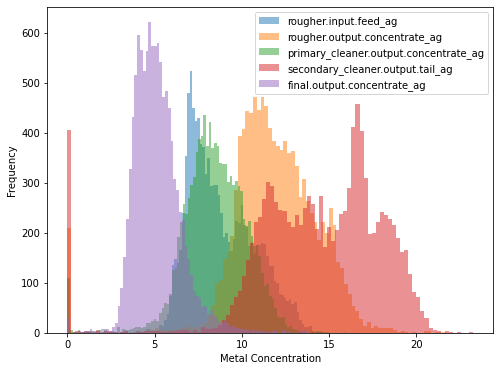

In [144]:
# for Ag

ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','secondary_cleaner.output.tail_ag','final.output.concentrate_ag']
plot_pur_stage(train, ag)

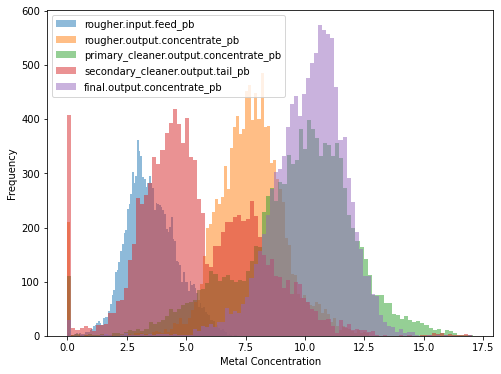

In [145]:
#for Pb

pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb','secondary_cleaner.output.tail_pb','final.output.concentrate_pb']
plot_pur_stage(train, pb)

We can see from the three graphs, the concentration for Gold (Au) gradually increased as it moved towards the final stage of the purification process. Which is what we expected and hoped to see. 

For silver (Ag) we can see the concentration gradually decreased as the purification process progresses. 

For lead (Pb), we observe that it has about the same concentration in the final output as compared to the rougher & primary stage. 

### Feed Particle Size Distribution

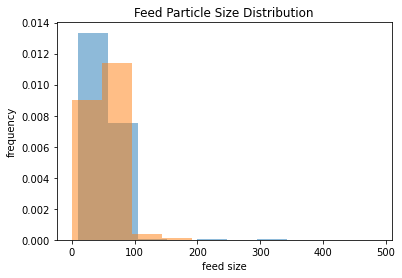

The average feed size for train data is: 57.215127655531404
The average feed size for test data is: 56.3386442150923


In [146]:
# plot a histogram 

plt.hist(train['rougher.input.feed_size'], density = True, alpha = 0.5, label = 'Train Feed Size')
plt.hist(test['rougher.input.feed_size'], density = True, alpha = 0.5, label = 'Test Feed Size')
plt.xlabel('feed size')
plt.ylabel('frequency')
plt.title('Feed Particle Size Distribution')
plt.show()

print('The average feed size for train data is:', train['rougher.input.feed_size'].mean())
print('The average feed size for test data is:', test['rougher.input.feed_size'].mean())

We see that both dataset has a similar feed size based on the average and the distribution. Therefore our model evaluation will not be incorrect. 

### Concentration of All Metals at Different Stages

To do this, we will take the concentrations of all the metals and group them into different stages.

In [147]:
#input

input_all = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']

#Rougher

rougher_all = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']

#final

output_all = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']

#add all
full['input_full'] = full[input_all].sum(axis = 1, skipna = True)
full['rougher_full'] = full[rougher_all].sum(axis = 1, skipna = True)
full['output_full'] = full[output_all].sum(axis = 1, skipna = True)

We will then plot them using histogram. 

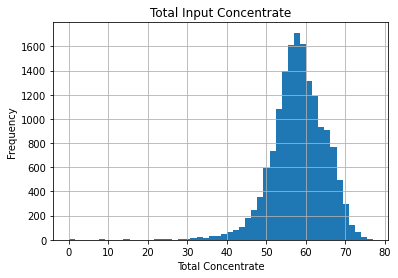

In [148]:
# for all inputs

full['input_full'].hist(bins = 50, label = 'Input Concentrates')
plt.title('Total Input Concentrate')
plt.xlabel('Total Concentrate')
plt.ylabel('Frequency')
plt.show()

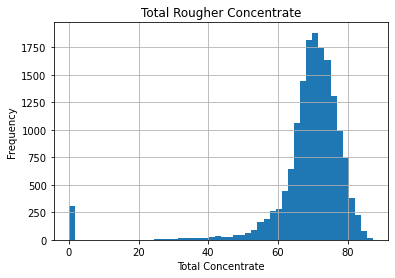

In [149]:
# for all Roughers

full['rougher_full'].hist(bins = 50, label = 'Rougher Concentrates')
plt.title('Total Rougher Concentrate')
plt.xlabel('Total Concentrate')
plt.ylabel('Frequency')
plt.show()

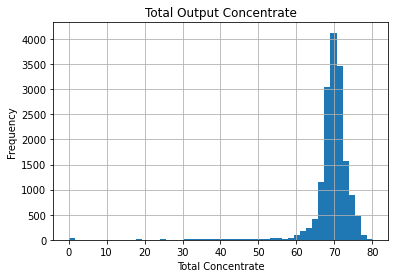

In [150]:
# for all outputs

full['output_full'].hist(bins = 50, label = 'Output Concentrates')
plt.title('Total Output Concentrate')
plt.xlabel('Total Concentrate')
plt.ylabel('Frequency')
plt.show()

We see that even by dropping the missing values, the distribution is slightly skewed to the right with several outliers. We should remove those outliers to train our model better.  

In [151]:
#removing outliers by using iqr remove outliers that are outside of the range

from collections import defaultdict
def remove_outlier(dataframe_in, col):
    fence_map = defaultdict(list)
    for name in col:
        q1 = dataframe_in[name].quantile(0.25)
        q3 = dataframe_in[name].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        fence_map[name] = (low, high)
    dataframe_out = dataframe_in
    for k, v in fence_map.items():
        dataframe_out = dataframe_out.loc[(dataframe_out[k] > v[0]) & (dataframe_out[k] < v[1])]
        
    return dataframe_out
    
parameters = ['input_full', 'output_full', 'rougher_full']

print(full.shape)

full_no_out = remove_outlier(full, parameters)
print(full_no_out.shape)

(16094, 90)
(14367, 90)


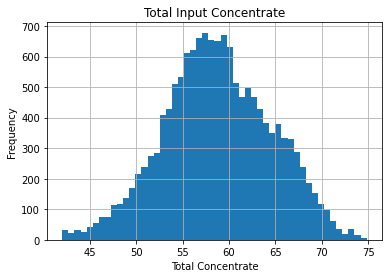

In [152]:
full_no_out['input_full'].hist(bins = 50, label = 'Input Concentrates')
plt.title('Total Input Concentrate')
plt.xlabel('Total Concentrate')
plt.ylabel('Frequency')
plt.show()

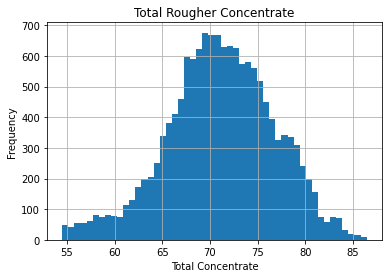

In [153]:
# for all Roughers

full_no_out['rougher_full'].hist(bins = 50, label = 'Rougher Concentrates')
plt.title('Total Rougher Concentrate')
plt.xlabel('Total Concentrate')
plt.ylabel('Frequency')
plt.show()

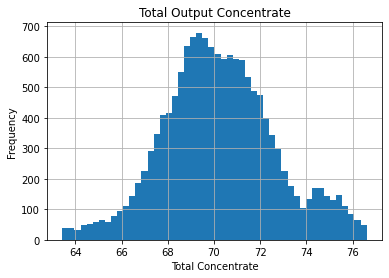

In [154]:
# for all outputs

full_no_out['output_full'].hist(bins = 50, label = 'Output Concentrates')
plt.title('Total Output Concentrate')
plt.xlabel('Total Concentrate')
plt.ylabel('Frequency')
plt.show()

After the removal of outliers, the distributions look better than before. We will proceed with the training and test set, removing outliers the same way for better model training. 

In [155]:
#remove outliers for train
train['input_full'] = train[input_all].sum(axis = 1, skipna = True)
train['rougher_full'] = train[rougher_all].sum(axis = 1, skipna = True)
train['output_full'] = train[output_all].sum(axis = 1, skipna = True)

parameters = ['input_full', 'output_full', 'rougher_full']

print(train.shape)

train_no_out = remove_outlier(train, parameters)
print(train_no_out.shape)

(11017, 90)
(9857, 90)


Since the test sets are missing a few features, and some of them that we will need, including:

- 'rougher.output.recovery',
- 'final.output.recovery', 
- 'rougher.output.concentrate_au', 
- 'rougher.output.concentrate_ag',
- 'rougher.output.concentrate_pb', 
- 'rougher.output.concentrate_sol', 
- 'final.output.concentrate_au', 
- 'final.output.concentrate_ag', 
- 'final.output.concentrate_pb', 
- 'final.output.concentrate_sol' 

We can obtain these information from the full set. 

In [156]:
#collect columns and info from full set

subset = ['date', 'rougher.output.recovery', 'final.output.recovery', 'rougher.output.concentrate_au', 
          'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
         'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
          'final.output.concentrate_sol']

sub_full = full.loc[:, list(subset)]
sub_full.head()

#merge to test set by date

test_new = test.merge(sub_full, on = 'date')
test_new.shape

(5077, 63)

In [157]:
#remove outliers for test

test_new['input_full'] = test_new[input_all].sum(axis = 1, skipna = True)
test_new['rougher_full'] = test_new[rougher_all].sum(axis = 1, skipna = True)
test_new['output_full'] = test_new[output_all].sum(axis = 1, skipna = True)

parameters = ['input_full', 'output_full', 'rougher_full']

print(test_new.shape)

test_no_out = remove_outlier(test_new, parameters)
print(test_no_out.shape)

(5077, 66)
(4568, 66)


In [158]:
#drop the four columns that we no longer need
train_no_out = train_no_out.drop(['input_full', 'rougher_full', 'output_full'], axis = 1)

print(train_no_out.shape)

test_no_out = test_no_out.drop(['input_full', 'rougher_full', 'output_full'], axis = 1)

print(test_no_out.shape)

(9857, 87)
(4568, 63)


In [161]:
#to keep consistency, we will use only the columns that are present in the test set(without any output features) as features. 

train_targets = train_no_out[['rougher.output.recovery', 'final.output.recovery']]
train_features = train_no_out.loc[:, list(test.columns)]
train_features = train_features.drop(['date'], axis = 1)

test_targets = test_no_out[['rougher.output.recovery', 'final.output.recovery']]
test_features = test_no_out.loc[:, list(test.columns)]
test_features = test_features.drop(['date'], axis = 1)
                                        
print(train_targets.shape,
      test_targets.shape,
train_features.shape,
     test_features.shape)

(9857, 2) (4568, 2) (9857, 52) (4568, 52)


We analyzed metal concentration through different stages, calculated that there is no significant difference between the particle feed size. And checked the total concentration. Lastly, we eliminated outliers by using the IQR. 

## Model Development and Training

We first will write a function to calculate sMAPE, since this will be repeated by different models to save time. 

In [162]:
#function for sMAPE

def smape_calc(x, y):
    smape_rough = (np.mean((np.abs(x.iloc[:,0] - y[:, 0]) /
                              ((np.abs(x.iloc[:,0]) + np.abs(y[:,0])) / 2))) * 100)
    smape_final = (np.mean((np.abs(x.iloc[:,1] - y[:, 1]) /\
                            ((np.abs(x.iloc[:,1]) + np.abs(y[:,1])) / 2))) * 100)
    
    final_smape = 0.25 * smape_rough + 0.75 * smape_final
    
    return final_smape


### Before Model Training

In [163]:
#Create scorer

smape_scorer = make_scorer(smape_calc, greater_is_better = False)

#Scale

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

### Decision Tree Model

In [204]:
#To find the best output

for depth in range(1, 11):
    tree_model = DecisionTreeRegressor(max_depth = depth, random_state = 12345)
    tree_smape = cross_val_score(tree_model, train_features, train_targets, scoring = smape_scorer, cv = 5)
    print('Max_depth of', depth, 'with sMAPE score of:', tree_smape.mean())

Max_depth of 1 with sMAPE score of: 7.340366904400247
Max_depth of 2 with sMAPE score of: 7.322338251762142
Max_depth of 3 with sMAPE score of: 8.45811058746149
Max_depth of 4 with sMAPE score of: 9.129890989418044
Max_depth of 5 with sMAPE score of: 10.029879197239648
Max_depth of 6 with sMAPE score of: 9.392748990917386
Max_depth of 7 with sMAPE score of: 9.962765844673129
Max_depth of 8 with sMAPE score of: 10.57702341735659
Max_depth of 9 with sMAPE score of: 11.346055435472518
Max_depth of 10 with sMAPE score of: 11.25420183765315


It seems that max_depth of 2 gives us the lowest sMAPE score.

### Random Forest Model

In [210]:
#find the best output
for depth in range(1, 11):
    forest_model = RandomForestRegressor(max_depth = depth, random_state = 12345)
    forest_smape = cross_val_score(forest_model, train_features, train_targets, scoring = smape_scorer, cv = 5)
    print('Max_depth of', depth, 'with sMAPE score of:', forest_smape.mean())

Max_depth of 1 with sMAPE score of: 7.262801090658236
Max_depth of 2 with sMAPE score of: 7.306168317060639
Max_depth of 3 with sMAPE score of: 7.8360869954496035
Max_depth of 4 with sMAPE score of: 7.813423940596417
Max_depth of 5 with sMAPE score of: 7.8108973509234945
Max_depth of 6 with sMAPE score of: 7.813435510578725
Max_depth of 7 with sMAPE score of: 7.862658867537069
Max_depth of 8 with sMAPE score of: 7.978800300646429
Max_depth of 9 with sMAPE score of: 7.899045987213182
Max_depth of 10 with sMAPE score of: 7.956177879038323


It appears that a max_depth of 1 gave us the lowest sMAPE score. 

### Linear Regression Model

In [212]:
linear_model = LinearRegression()
linear_smape = cross_val_score(linear_model, train_features, train_targets, scoring = smape_scorer, cv = 5)
print('The sMAPE score for Linear model is:', linear_smape.mean())

The sMAPE score for Linear model is: 7.7011730936812


### Final Testing

Since our random_forest model with a max_depth of 1 gave us the lowest sMAPE score, we will use that.

In [215]:
# randomforest

final_model = RandomForestRegressor(max_depth = 1, random_state = 12345)
final_model.fit(train_features, train_targets)
predictions = final_model.predict(test_features)
print('sMAPE score of the final model is:', smape_calc(test_targets, predictions))


sMAPE score of the final model is: 6.530457654850632


Our RandomForest model did better on the test set, with a sMAPE score of 6.53%. 

In [171]:
#constant model

from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy = 'mean')
dummy_model.fit(train_features, train_targets)
dummy_prediction = dummy_model.predict(test_features)

print('sMAPE for dummy model using test dataset is:', smape_calc(test_targets, dummy_prediction))

sMAPE for dummy model using test dataset is: 6.8986931040557975


The sMAPE for a dummy model using test dataset is 6.89%. Our RandomForest model did slightly better in terms of lower sMAPE scores.

## Conclusion

We performed several processes to prepare the data for model training. We first dropped missing values in the dataset, we also check to see whether there are some features not available in the test set, we then onverted date column to datetime objects. We finally create the targets with rougher.output.recovery and final.output.recovery to determine the final sMAPE.

We then analyzed the metal concentration at each purification stages and found that Gold concentration is highest at the final stage. While lead does not change much, and silver is the highest at the begining of the process. We then analyzed the particle feed size and found them to be pretty consistent. 

Lastly, we trained several models and found that random forest model with max_depth of 1 worked the best. And we obtained a sMAPE score of 6.53% for our final model fitting. We then did a sanity check with a dummymodel that predicts the mean of the train set targets, we obtain a sMAPE score of 6.89%. Our model did a slight better job than the constant model. 